In [1]:
import music21
from music21 import note
from music21 import stream
from music21 import *

"""
函数txt2music实现从字符串 ms （必须是32个音符，中间用空格隔开）到music文件 score 的转化
return 一个 score 是music21里面的Stream对象
score.show() 用乐谱形式展示score
score.show("midi") 用midi形式展示score
score.write("musicxml.png","name") 保存png格式的乐谱
score.write("musicxml.pdf","name") 保存pdf格式的乐谱
"""

def txt2music(ms):
    score=stream.Stream([])
    id=0
    while id < 32:
        key=ms[id]

        if key=="0":
            n=note.Rest()
            n.duration.quarterLength=0.5
            id+=1

            if id==32:
                score.append(n)
                break

            while ms[id]=="-":
                n.duration.quarterLength+=0.5
                id+=1
                if id==32:
                    score.append(n)
                    break
                
            score.append(n)

        else:
            n=note.Note(key) # 创建这个音
            n.duration.quarterLength=0.5
            id+=1

            if id==32:
                score.append(n)
                break

            while ms[id]=="-":
                n.duration.quarterLength+=0.5
                id+=1
                if id==32:
                    score.append(n)
                    break
            
            score.append(n)

    return score

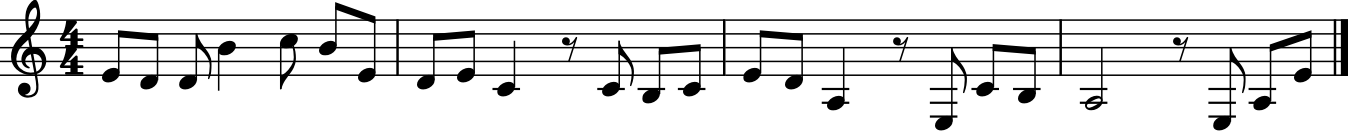

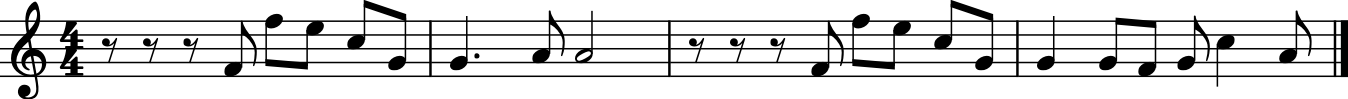

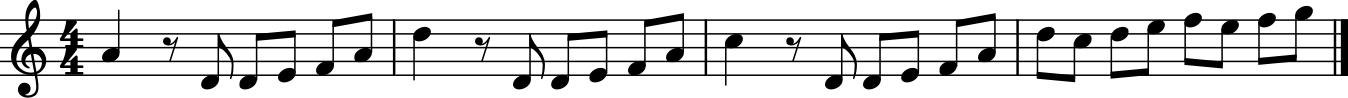

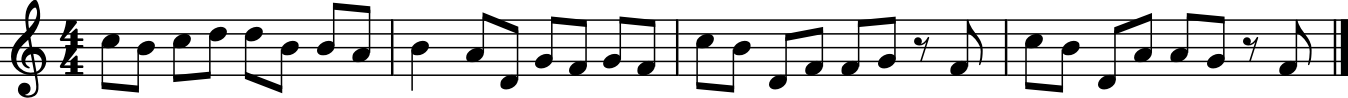

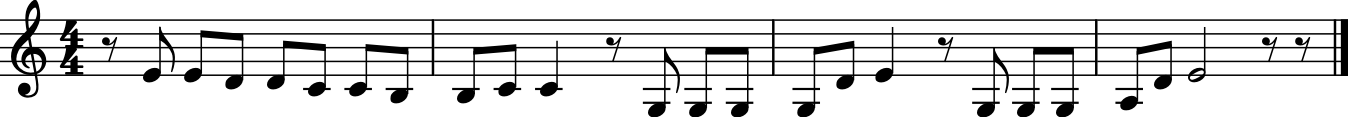

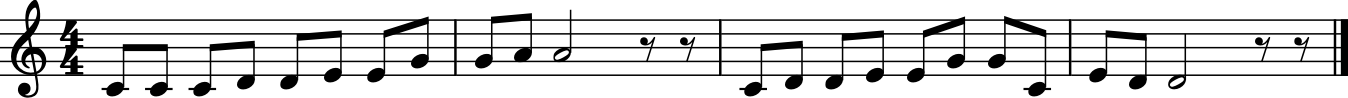

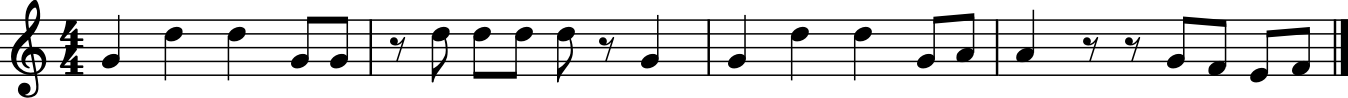

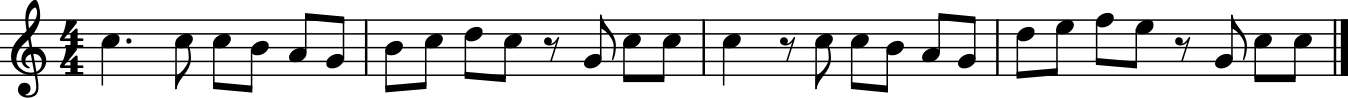

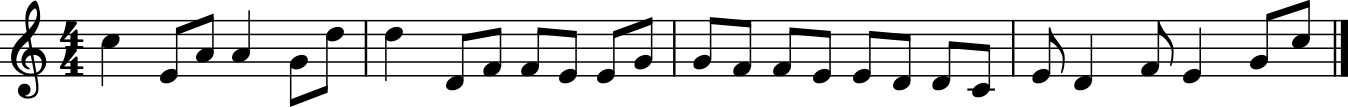

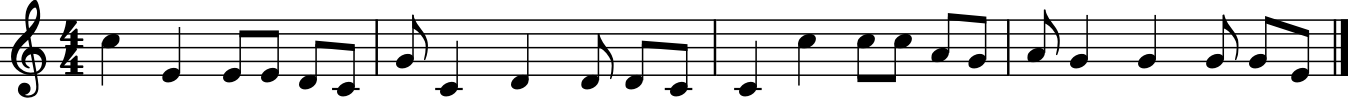

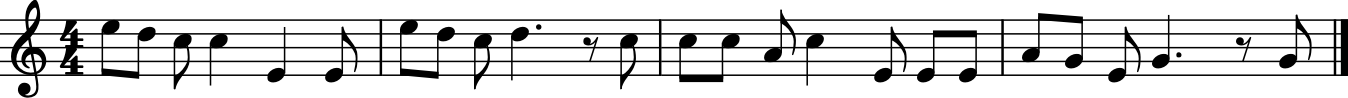

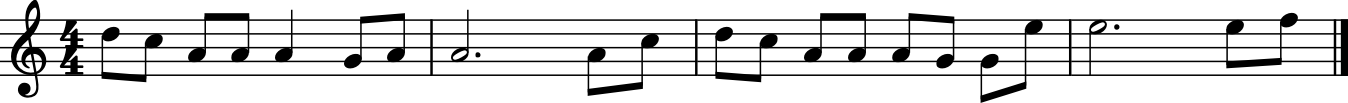

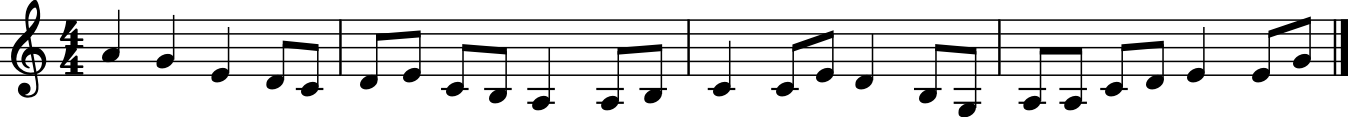

In [2]:
# 一个实例
'''
会读取../data/test for func.txt
按行生成乐谱和midi，分别输出
'''
scorecollect=[]
with open("../data/test for func.txt",encoding="utf-8") as f:
    for line in f.readlines():
        line=line.rstrip()
        line=line.split(" ")
        scorecollect.append(txt2music(line))

for score in scorecollect:
    score.show()
    score.show("midi")
